## Data ingestion from Kaggle - Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 78.6MB/s]


In [ ]:
import zipfile

# Define the path to your zip file
# file_path = '/content/drive/MyDrive/kaggle/your_file.zip'  # Replace 'your_file.zip' with your file's name
file_path = '/content/credit-card-customer-churn-prediction.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder
    zip_ref.extractall('/content/')  # Replace 'destination_folder' with your desired folder

## Module imports

In [41]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import os

## Data ingestion from Drive - Local

In [2]:
raw_data_path = "../data/interim/Churn_Modelling.csv"

In [3]:
# load data from drive
df = pd.read_csv(raw_data_path)

In [4]:
# Shape of the data
df.shape

(10000, 14)

## Exploratory data analysis and preprocessing

### Analysis and preprocessing - 1

In [51]:
preprocess_iter = 1

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The following columns are not significant for the analysis and we are going to drop them from the datatset

- ["RowNumber", "CustomerId", "Surname"]

In [7]:
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]

df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.shape

(10000, 11)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Checking of missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
# Extracting columns with datatype as numnerical
# It will also include categorical columns that are already encoded
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [13]:
# Extracting columns that has datatype not equal to numeric (means categorical)
categorical_cols = list(set(df.columns) - set(numerical_cols))
categorical_cols

['Gender', 'Geography']

In [14]:
# categorical column frequency distribution
for col in categorical_cols:
  print(df[col].value_counts())
  print()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64



In [15]:
# categorical column relative frequency distribution
for col in categorical_cols:
  print((df[col].value_counts()/df.shape[0])*100)
  print()

Gender
Male      54.57
Female    45.43
Name: count, dtype: float64

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: count, dtype: float64



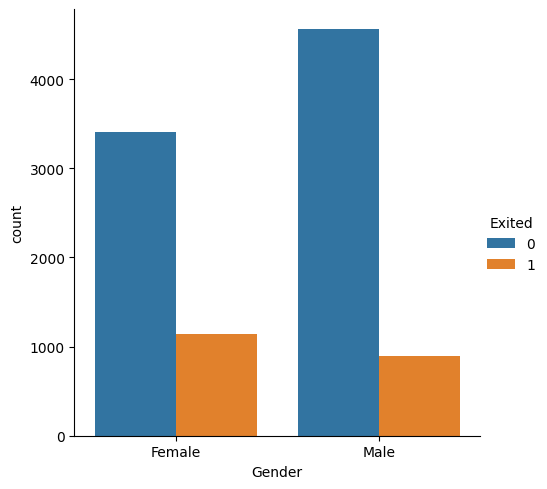

In [16]:
# categorical column - Gender relative frequency distribution
sns.catplot(data=df, x="Gender", kind="count", hue="Exited")

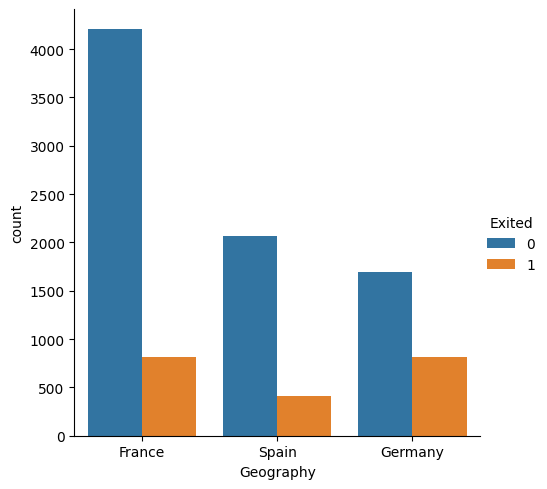

In [17]:
# categorical column - Geography relative frequency distribution
sns.catplot(data=df, x="Geography", kind="count", hue="Exited")

In [18]:
# we can look at the count of unique values in numerical columns to indentify encoded categorical columns
for col in numerical_cols:
  print(col, "=>", len(df[col].unique()))

CreditScore => 460
Age => 70
Tenure => 11
Balance => 6382
NumOfProducts => 4
HasCrCard => 2
IsActiveMember => 2
EstimatedSalary => 9999
Exited => 2


In [19]:
# we can look the frequency distrubition of potential encoded categorical columns
for col in numerical_cols:
  if(len(df[col].unique()) <= 11):
    print(df[col].value_counts())
    print()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Exited
0    7963
1    2037
Name: count, dtype: int64



In [20]:
# we can look the relative frequency distrubition of potential encoded categorical columns
for col in numerical_cols:
  if(len(df[col].unique()) <= 11):
    print((df[col].value_counts()/df.shape[0])*100)
    print()

Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: count, dtype: float64

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: count, dtype: float64

HasCrCard
1    70.55
0    29.45
Name: count, dtype: float64

IsActiveMember
1    51.51
0    48.49
Name: count, dtype: float64

Exited
0    79.63
1    20.37
Name: count, dtype: float64



In [21]:
# capture encoded categorical columns
categorical_encoded_cols = []

for col in numerical_cols:
  if(len(df[col].unique()) <= 11):
    categorical_encoded_cols.append(col)

categorical_encoded_cols

['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

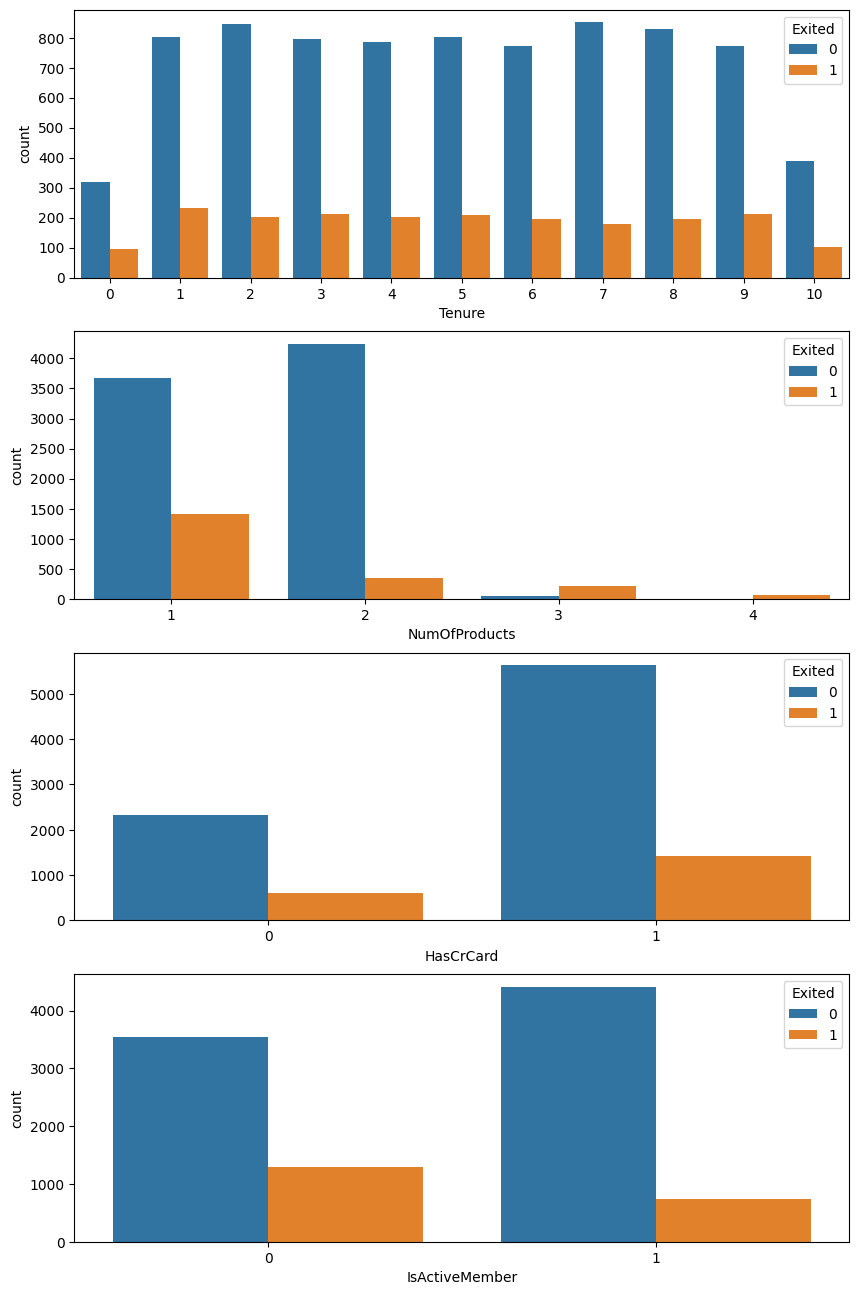

In [22]:
# we can look the frequency distrubition of potential encoded categorical columns
plt.figure(figsize=(10, 16))

columns = categorical_encoded_cols[:-1]

for i, column in enumerate(columns):
  plt.subplot(len(columns),1,i+1)
  sns.countplot(data=df, x=column, hue="Exited")

In [23]:
# truly numerical columns (without encoded categorical columns)
numerical_cols = list(set(numerical_cols) - set(categorical_encoded_cols))
numerical_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

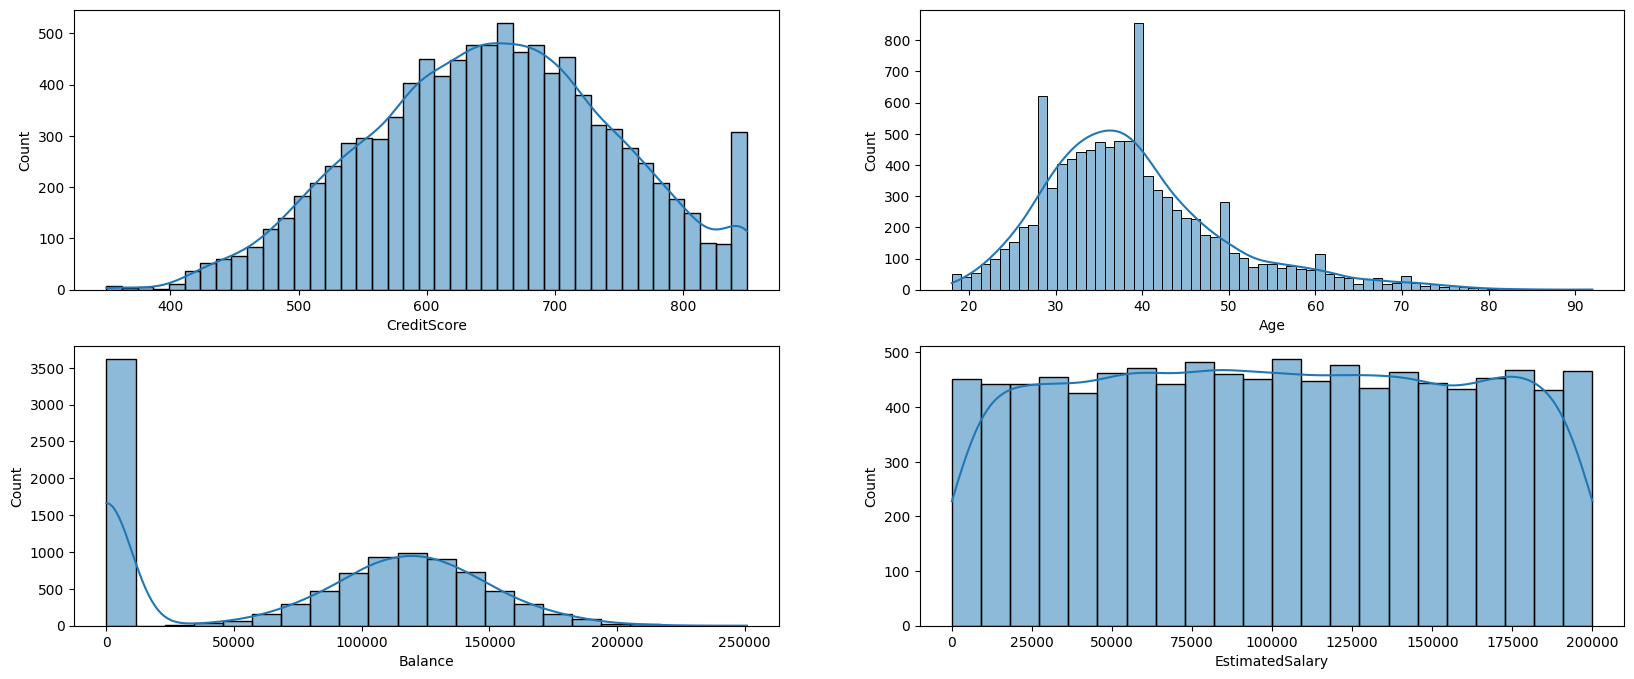

In [24]:
# Frequency distribution of truly numerical columns
plt.figure(figsize=(20,8))

for i, col in enumerate(numerical_cols):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],
               kde=True)

plt.show()

In [25]:
# Checking the skewness of the numerical columns
df[numerical_cols].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [26]:
# Checking kurtosis of the columns
print(df[numerical_cols].kurtosis())

# we can also get the absolute kurtosis values as follows
# print(df[numerical_cols].kurtosis(fisher=False))

CreditScore       -0.425726
Age                1.395347
Balance           -1.489412
EstimatedSalary   -1.181518
dtype: float64


In [27]:
# list of un-encoded categorical columns
categorical_cols

['Gender', 'Geography']

### Train test split

In [28]:
# Feature and Label split
X = df.drop(columns="Exited")
y = df["Exited"]

In [29]:
print(X.shape)
X.head()

(10000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
print(y.shape)
y.head()

(10000,)


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
# Train Test split (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

### Transformation

In [32]:
# Initializing column transformer
# Categorical columns - OHE
# Numerical columns - MinMaxScaler (As not all the columns are normally distributed)
column_transformer = ColumnTransformer(
    transformers=[
        ('tnf1_OneHotEncoder', OneHotEncoder(sparse=False, drop='first'), categorical_cols),
        ('tnf2_Scaling', MinMaxScaler(), numerical_cols)
        ],
    remainder='passthrough')

In [33]:
# fitting and transforming on X_train data
X_train_transformed = column_transformer.fit_transform(X_train)

# transforming the X_test
X_test_transformed = column_transformer.transform(X_test)

In [34]:
# shape of the transformed data
X_train_transformed.shape

(8000, 11)

Comparing the data before and after transformation

In [35]:
# before transformation - first two records of X_train
X_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7496,824,Germany,Male,49,8,133231.48,1,1,1,67885.37
7694,676,Spain,Female,64,4,116954.32,1,1,1,91149.48


In [36]:
# After transformation - first two records of X_train
X_train_transformed[0:2]

array([[1.        , 1.        , 0.        , 0.948     , 0.41891892,
        0.55888604, 0.33940136, 8.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , 0.652     , 0.62162162,
        0.4906058 , 0.45573302, 4.        , 1.        , 1.        ,
        1.        ]])

In [37]:
# summary of min, max, mean and standard deviation of the numerical columns before transformation
print(X_train[numerical_cols].min())
print(X_train[numerical_cols].max())
print(X_train[numerical_cols].mean())
print(X_train[numerical_cols].std())

CreditScore        350.00
Age                 18.00
Balance              0.00
EstimatedSalary     11.58
dtype: float64
CreditScore           850.00
Age                    92.00
Balance            238387.56
EstimatedSalary    199992.48
dtype: float64
CreditScore           650.799625
Age                    38.996250
Balance             76341.556999
EstimatedSalary    100130.874959
dtype: float64
CreditScore           96.779887
Age                   10.598504
Balance            62532.310263
EstimatedSalary    57495.191255
dtype: float64


In [38]:
# summary of min, max, mean and standard deviation of the numerical columns after transformation
print(X_train_transformed[:, 3:7].min(axis=0))
print(X_train_transformed[:, 3:7].max(axis=0))
print(X_train_transformed[:, 3:7].mean(axis=0))
print(X_train_transformed[:, 3:7].std(axis=0))

[0. 0. 0. 0.]
[1. 1. 1. 1.]
[0.60159925 0.28373311 0.32024136 0.50064429]
[0.19354768 0.14321407 0.26229725 0.28748544]


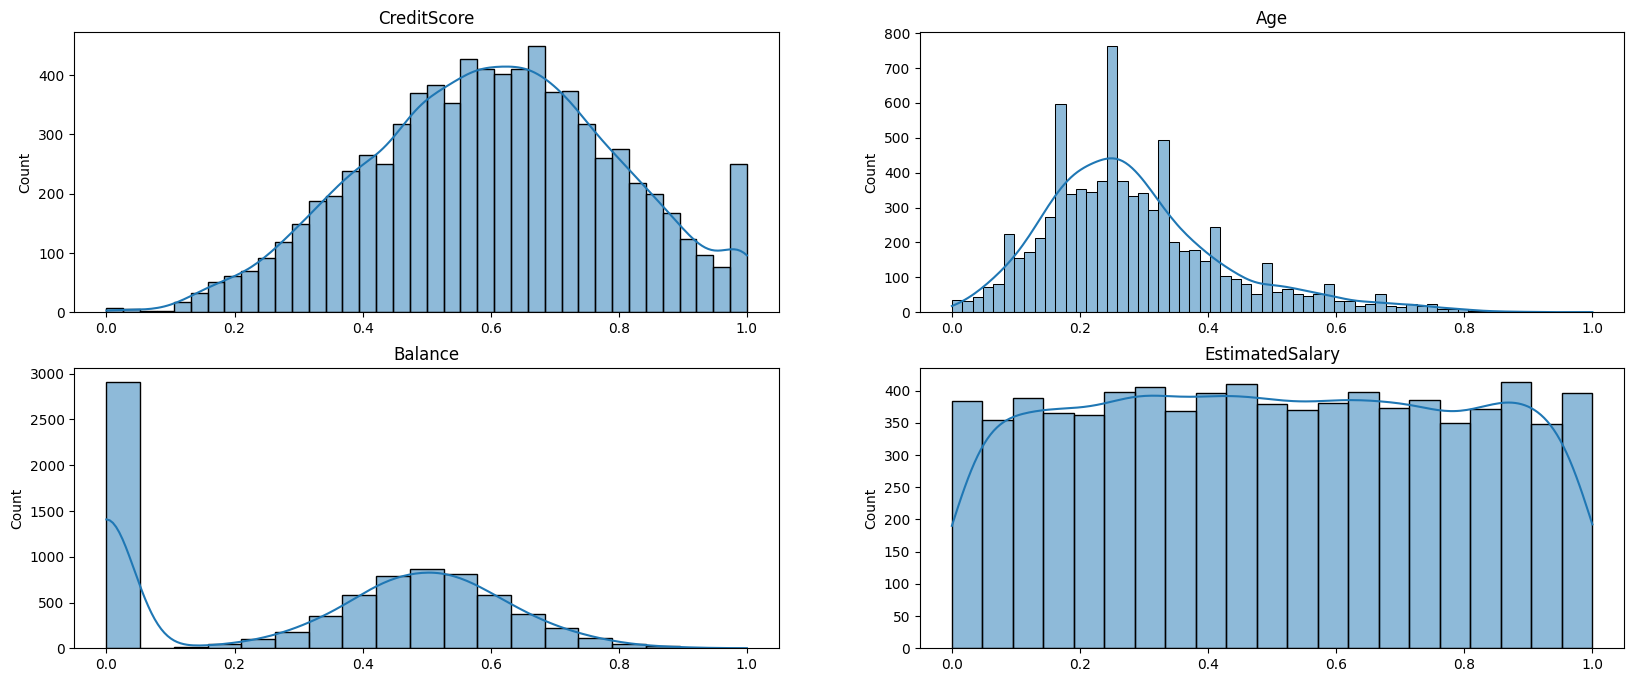

In [39]:
# count plots of numerical columns after transformation
plt.figure(figsize=(20,8))

for i, col in enumerate(range(3,7)):
  plt.subplot(2,2,i+1)
  sns.histplot(X_train_transformed[:,col],
               kde=True)
  plt.title(f"{numerical_cols[i]}")

plt.show()

In [40]:
# fetching the list of classes of OHE columns from the transformer
print(column_transformer.named_transformers_['tnf1_OneHotEncoder'].categories_)
print()

# fetching the encoded values of classes of OHE columns from the transformer
for i, cols in enumerate(categorical_cols):
  for j, class_name in enumerate(column_transformer.named_transformers_['tnf1_OneHotEncoder'].categories_[i]):
    if (j == 0):
      print(np.zeros(len(column_transformer.named_transformers_['tnf1_OneHotEncoder'].categories_[i])-1), "=>", class_name)
    else:
      temp_array = np.zeros(len(column_transformer.named_transformers_['tnf1_OneHotEncoder'].categories_[i])-1)
      temp_array[j-1] = 1
      print(temp_array, "=>", class_name)
  print()

[array(['Female', 'Male'], dtype=object), array(['France', 'Germany', 'Spain'], dtype=object)]

[0.] => Female
[1.] => Male

[0. 0.] => France
[1. 0.] => Germany
[0. 1.] => Spain



## Export data

In [64]:
data_preprocessed_path = "e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\data\\processed"
notebook_dir_path = "e:\\LFS\\Projects\\DS_AI_ML_DL\\ML\\DL Experimentation Pipeline\\notebooks"

In [67]:
os.chdir(data_preprocessed_path)

In [60]:
current_preprocess_iter = 1

In [59]:
if (preprocess_iter == current_preprocess_iter):
    pass
else:
    raise ValueError("Please check the preprocessing iteration number")

In [69]:
current_iter_data_dir = f"data_{preprocess_iter}"

os.mkdir(current_iter_data_dir)

In [70]:
current_iter_data_dir_path = os.path.join(data_preprocessed_path, current_iter_data_dir)

In [72]:
export_x_train_transformed_path = os.path.join(current_iter_data_dir_path, "X_train_transformed.npy")
export_y_train_path = os.path.join(current_iter_data_dir_path, "y_train.npy")

export_x_test_transformed_path = os.path.join(current_iter_data_dir_path, "X_test_transformed.npy")
export_y_test_path = os.path.join(current_iter_data_dir_path, "y_test.npy")

In [73]:
# Save training data
np.save(export_x_train_transformed_path, X_train_transformed)
np.save(export_y_train_path, y_train)

In [74]:
# Save test data
np.save(export_x_test_transformed_path, X_test_transformed)
np.save(export_y_test_path, y_test)